In [2]:
import pickle
from utils import extract_features
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(suppress=True)
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import seaborn as sns

In [3]:
#Define path to dataset directory, this script is specific for the donate a cry corpus dataset
path = '/home/pi/CryClassification/dataset1' 
#Initialize empty lists to hold extracted features and labels
features = []
labels = []

In [4]:
#Loop through the directories
for label in os.listdir(path):
    #Loop through the files in each directory
    print(f"{label} data is loading.....")
    for file_name in os.listdir(os.path.join(path, label)):
        file_path = os.path.join(path, label, file_name)
        #Extract features and append to list
        feature = extract_features(file_path)
        if feature is not None:
            features.append(feature)
            labels.append(label)
    print(f"{label} data loaded....")

noise data is loading.....
noise data loaded....
laugh data is loading.....
laugh data loaded....
cry data is loading.....
cry data loaded....
silence data is loading.....


/home/pi/CryClassification/venv/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


silence data loaded....


In [26]:
features = np.array(features)
labels = np.array(labels)
#Encode labels as integers, noise=2, laugh=1, cry=0 and silence=3
le = LabelEncoder()
labels = le.fit_transform(labels)
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [41]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
#Train random forest model, chosen by comparing accuracy scores of multiple model types
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
#Print accuracy score
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9629629629629629


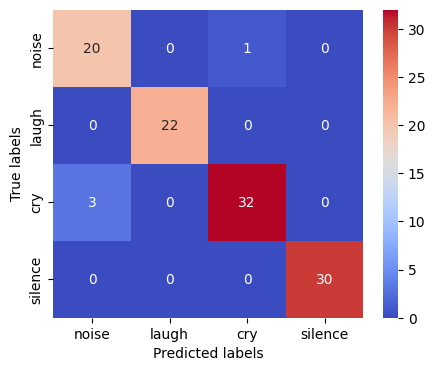

In [9]:
cm = confusion_matrix(y_test, rf_pred)

# Define the label names
label_names = ['noise','laugh','cry','silence'] # Add your label names here

# Plot the confusion matrix with a colormap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [56]:
test_features = extract_features('/home/pi/CryClassification/est.wav')
df_test = pd.DataFrame(test_features).transpose()

In [57]:
prediction = rf.predict(df_test)

In [58]:
prediction

array([0])

In [59]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.7870370370370371


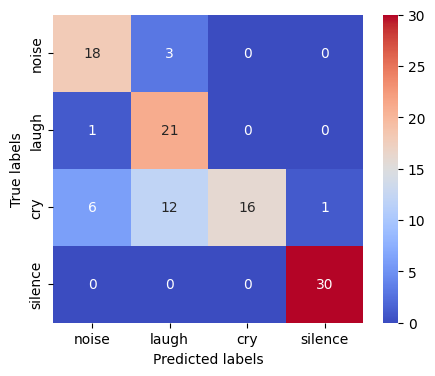

In [60]:
cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [61]:
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9074074074074074


In [62]:
prediction = knn.predict(df_test)
prediction

array([0])

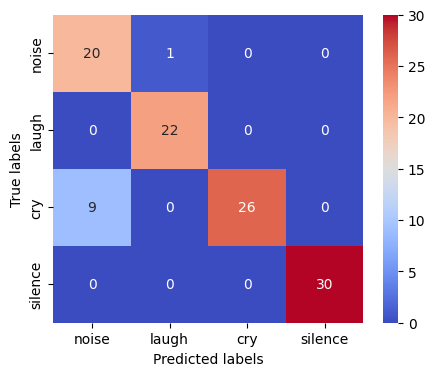

In [49]:
cm = confusion_matrix(y_test, svm_pred)

# Define the label names

# Plot the confusion matrix with a colormap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()

# Train the model using the training sets
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
dts_pred = clf.predict(X_test)

# Print model accuracy
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.87


In [51]:
prediction = clf.predict(df_test)
prediction

array([2])

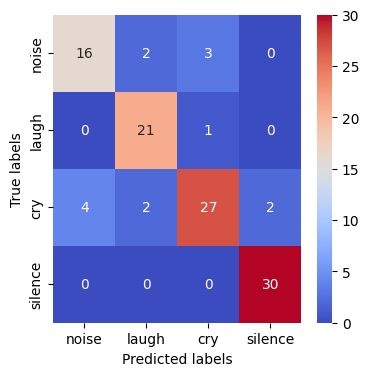

In [52]:
cm = confusion_matrix(y_test, dts_pred)

# Plot the confusion matrix with a colormap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [53]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define XGBoost classifier with default hyperparameters
xgb_clf = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Predict labels on test data
xgb_pred = xgb_clf.predict(X_test)

# Compute accuracy score
acc = accuracy_score(y_test, xgb_pred)
print("XGBoost accuracy:", acc)

XGBoost accuracy: 0.9351851851851852


In [54]:
prediction = xgb_clf.predict(df_test)
prediction

array([2])

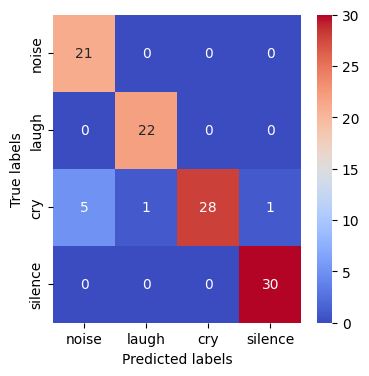

In [55]:
cm = confusion_matrix(y_test, xgb_pred)
# Plot the confusion matrix with a colormap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()